In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
dataset = pd.read_csv("loan.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
dataset.shape

(614, 13)

In [35]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: xlabel='CoapplicantIncome'>

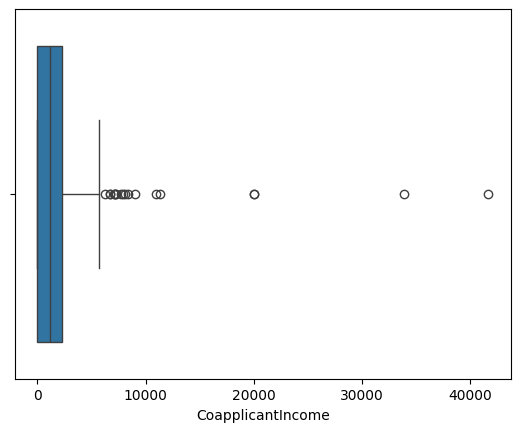

In [37]:
sns.boxplot(x="CoapplicantIncome",data=dataset)

C:\Users\Subhan Computers\AppData\Local\Temp\ipykernel_1100\2328021184.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

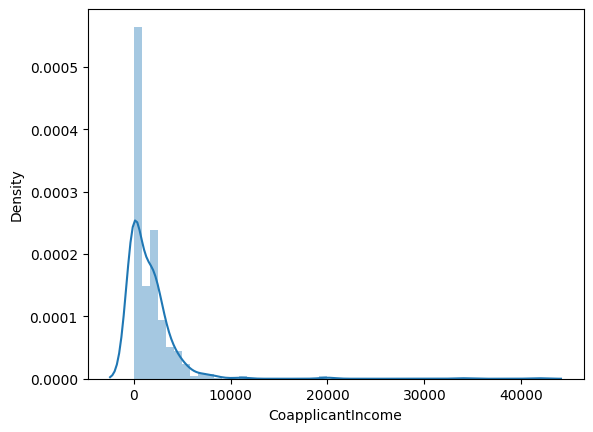

In [38]:
sns.distplot(dataset["CoapplicantIncome"])

In [39]:
min_range = dataset["CoapplicantIncome"].mean() - (3*dataset["CoapplicantIncome"].std())
max_range = dataset["CoapplicantIncome"].mean() + (3*dataset["CoapplicantIncome"].std())

In [40]:
min_range , max_range

(np.float64(-7157.4993096454655), np.float64(10399.990905699668))

In [41]:
new_dataset = dataset[dataset["CoapplicantIncome"]<=max_range]

In [49]:
new_dataset.shape

(608, 13)

<Axes: xlabel='CoapplicantIncome'>

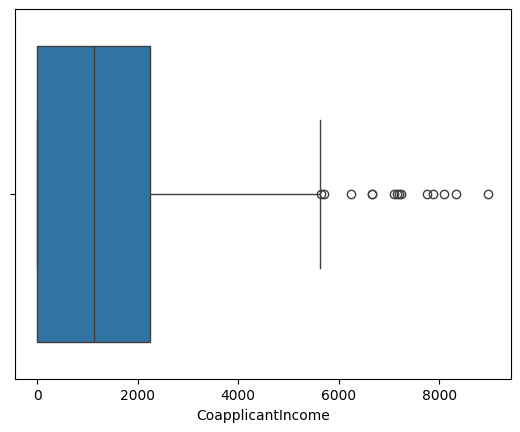

In [42]:
sns.boxplot(x="CoapplicantIncome",data=new_dataset)

C:\Users\Subhan Computers\AppData\Local\Temp\ipykernel_1100\313975805.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset["CoapplicantIncome"])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

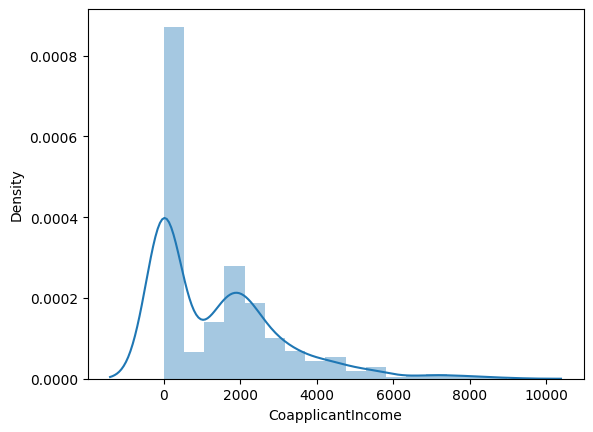

In [43]:
sns.distplot(new_dataset["CoapplicantIncome"])

In [54]:
import numpy as np

In [55]:
# Calculate Z-score correctly
dataset["Z_score"] = (dataset["CoapplicantIncome"] - dataset["CoapplicantIncome"].mean()) / dataset["CoapplicantIncome"].std()

In [56]:
# Remove outliers (Z-score < 3 and > -3)
filtered_dataset = dataset[np.abs(dataset["Z_score"]) < 3]

In [57]:
filtered_dataset.shape  # Check new shape after outlier removal

(608, 14)